# Imports 

In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
from pathlib import Path
from os.path import basename, join, exists
from os import system, makedirs
from glob import glob
from pprint import pprint

from IPython.display import Image, display
from nltk.draw import TreeWidget
from nltk.draw.util import CanvasFrame
from nltk.tree import Tree

import sys
import re

from wordcloud import WordCloud

import requests
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from nltk.tree import ParentedTree
from nltk.tree import Tree
import matplotlib
matplotlib.use('Agg')

%matplotlib inline

# Utils functions 

In [5]:
from aspects.visualization import draw_trees

In [6]:
from aspects.utilities.transformations import load_serialized

# Path to the results 

In [7]:
df = pd.read_pickle('../results/reviews_Apps_for_Android-103-docs/discourse_trees_df.pkl')

In [65]:
tt = '"(Elaboration[N][S]\\n  (Elaboration[N][S]\\n    _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_\\n    _!15 months loves it !!_)\\n  _!Hopefully more apps like this are on the way !!_)"'

In [74]:
tt[1:-1].replace('\\n', '\n')

(Elaboration[N][S]
  (Elaboration[N][S]
    _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_
    _!15 months loves it !!_)
  _!Hopefully more apps like this are on the way !!_)


In [67]:
from pprint import pprint

In [70]:
pprint(tt[1:-1])

('(Elaboration[N][S]\\n  (Elaboration[N][S]\\n    _!Glad to finally see this '
 'app on the android market . my wife has it on her iphone and ipad and my '
 'son!_\\n    _!15 months loves it !!_)\\n  _!Hopefully more apps like this '
 'are on the way !!_)')


In [43]:
tt

'"(Elaboration[N][S]\\n  (Elaboration[N][S]\\n    _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_\\n    _!15 months loves it !!_)\\n  _!Hopefully more apps like this are on the way !!_)"'

In [ ]:
(Joint[N][N]
  _!U With accessories , you can make the iPod into a digital recorder ,!_
  (Joint[N][N]
    (Elaboration[N][S]
      _!broadcast it remotely through stereo speakers!_
      _!using wireless technology ,!_)
    (Elaboration[N][S]
      _!and play it through your car speakers!_
      _!using either a CD adaptor or FM stereo broadcaster.q . <P>!_
    )
  )
)

In [5]:
t = "(Elaboration[N][S]  (same-unit[N][N]    (Elaboration[N][S]      _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_      _!( 15 months )!_)    _!loves it !!_)  _!Hopefully more apps like this are on the way !!_)"

In [66]:
Tree.fromstring(
    """(Elaboration[N][S]\\n  (Elaboration[N][S]\\n    _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_   _!15 months loves it !!_)\\n  _!Hopefully more apps like this are on the way !!_)""".replace('\\n', ''),    
    leaf_pattern="(?<=_!).*(?=!_)"
).draw()

ValueError: Tree.read(): expected ')' but got 'end-of-string'
            at index 228.
                "...e way !!_)"
                              ^

In [53]:
tt[1:-1]

'(Elaboration[N][S]\\n  (Elaboration[N][S]\\n    _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_\\n    _!15 months loves it !!_)\\n  _!Hopefully more apps like this are on the way !!_)'

In [56]:
tree_1 = ParentedTree.fromstring(
    tt,
    leaf_pattern="(?<=_!).*(?=!_)"
)

ValueError: ParentedTree.read(): expected ')' but got 'end-of-string'
            at index 239.
                "... way !!_)""
                              ^

In [38]:
tree_1.draw()

In [13]:
tree_2 = ParentedTree.fromstring("""(
    Elaboration[N][S]  
        (same-unit[N][N]    
            (Elaboration[N][S]      
                _!Glad to finally see this app on the android market . my wife has it on her iphone and ipad and my son!_      
                _!( 15 months )!_
            )    
        _!loves it !!_
        )  
    _!Hopefully more apps like this are on the way !!_
    )""",
    leaf_pattern="(?<=_!).*(?=!_)",
                                 remove_empty_top_bracketing=True,+
)

In [19]:
repr_ = ParentedTree.fromstring(tree_2.pformat()).__repr__()

In [20]:
repr_

"ParentedTree('Elaboration[N][S]', [ParentedTree('same-unit[N][N]', [ParentedTree('Elaboration[N][S]', ['Glad', 'to', 'finally', 'see', 'this', 'app', 'on', 'the', 'android', 'market', '.', 'my', 'wife', 'has', 'it', 'on', 'her', 'iphone', 'and', 'ipad', 'and', 'my', 'son', ParentedTree('15', [])]), 'loves', 'it', '!']), 'Hopefully', 'more', 'apps', 'like', 'this', 'are', 'on', 'the', 'way', '!'])"

In [23]:
DISCOURSE_TREE_LEAF_PATTERN = "(?<=_!).*(?=!_)"
DISCOURSE_TREE_NODE_PATTERN = "(?<=ParentedTree).*"

In [30]:
ParentedTree.fromstring(
    s=repr_.replace('ParentedTree', ''),
#     leaf_pattern="(?<=_!).*(?=!_)",
    remove_empty_top_bracketing=True,
).draw()

In [14]:
tree_2.draw()

In [8]:
pt = ParentedTree.fromstring(str(df.discourse_tree.tolist()[2]))

In [39]:
pt[0,1,1,0].leaves()

AttributeError: 'str' object has no attribute 'leaves'

In [11]:
draw_trees.jupyter_draw_nltk_tree(pt, directory='.', show_tree=True)

FileNotFoundError: [Errno 2] No such file or directory: 'tmp.png'

In [68]:
pt.pprint()

("ParseTree
  ('textual-organization[N][N]',
    [ParseTree
    ('Evaluation[N][S]',
      [ParseTree
      ('Attribution[S][N]',
        [\"We
        love
        these
        monkey
        's
        and
        all
        the
        concepts\",
        ParseTree
        ('Attribution[S][N]',
          ['that
          you
          learn',
          'while
          working
          with
          them
          .'])
        ])
      ,
      ParseTree
      ('Explanation[N][S]',
        ['I
        love
        the
        jumping
        on
        the
        bed
        as
        well
        as
        the
        counting
        ,
        fine
        motor
        ,
        interactivity
        and
        finding
        of
        hidden
        objects
        .',
        ParseTree
        ('Elaboration[N][S]',
          ['When
          we
          play
          with
          this
          app
          my
          son
          experiments',
          ParseT

In [44]:
t = df.discourse_tree.tolist()[0] 

In [46]:
t.leaves()

['[ParseTree',
 '[ParseTree',
 "['Glad",
 'to',
 'finally',
 'see',
 'this',
 'app',
 'on',
 'the',
 'android',
 'market',
 '.',
 'my',
 'wife',
 'has',
 'it',
 'on',
 'her',
 'iphone',
 'and',
 'ipad',
 'and',
 'my',
 "son',",
 "'",
 'months',
 "']",
 ',',
 "'loves",
 'it',
 "!']",
 ',',
 "'Hopefully",
 'more',
 'apps',
 'like',
 'this',
 'are',
 'on',
 'the',
 'way',
 "!']",
 '\\n"']

In [57]:
t.__getitem__(t.leaf_treeposition(5))

'see'

In [41]:
f'{len(df[df.discourse_tree.apply(lambda t: True if t else False)]) / len(df) * 100}%'

'100.0%'

In [6]:
data_path = Path('../results/reviews_Apps_for_Android-100-docs/')
# data_path = '../results/Canon_S100'
# dataset_name = basename(data_path)
# data_path_trees = join(data_path,  'edu_trees_dir')
# data_path_link_tree = join(data_path,  'link_trees_dir')

In [8]:
list(data_path.glob('*'))

[PosixPath('../results/reviews_Amazon_Instant_Video-10000-docs/our'),
 PosixPath('../results/reviews_Amazon_Instant_Video-10000-docs/discourse_trees_df.pkl'),
 PosixPath('../results/reviews_Amazon_Instant_Video-10000-docs/our_top_1_rules')]

In [9]:
from tqdm import tqdm

In [10]:
import pickle

In [13]:
for r in tqdm(Path('../results').glob('reviews*10000*')):
    discoursee_tree_df_path = r / 'discourse_trees_df.pkl'
    if discoursee_tree_df_path.exists():
        try:
            df = pd.read_pickle(discoursee_tree_df_path)
            df = df[df.discourse_tree.apply(lambda t: True if t else False)]
            print(r, len(df))
        except pickle.UnpicklingError:
            print(f'UnpicklingError for {discoursee_tree_df_path.as_posix()}')

5it [00:00, 25.37it/s]

../results/reviews_Automotive-10000-docs 6
../results/reviews_Apps_for_Android-10000-docs 0
../results/reviews_Cell_Phones_and_Accessories-10000-docs 0
../results/reviews_Amazon_Instant_Video-10000-docs 0


In [57]:
t = df.sample(4).discourse_tree.tolist()[0]

In [60]:
if not t: print('ds')

ds


In [33]:
df.discourse_tree.

/home/laugustyniak/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



TclError: no display name and no $DISPLAY environment variable

Tree('', [])

# Get parse trees 

In [6]:
tree_names = [ basename(x) for x in glob(join(data_path_trees, '*.tree.ser'))]
n_docs = len(tree_names)

In [7]:
n_docs

530

In [8]:
tree_names[:10]

['230.tree.ser',
 '47.tree.ser',
 '8.tree.ser',
 '376.tree.ser',
 '363.tree.ser',
 '151.tree.ser',
 '90.tree.ser',
 '234.tree.ser',
 '358.tree.ser',
 '269.tree.ser']

In [9]:
tree_numbers = [x.split('.')[0] for x in tree_names]

In [10]:
tree_numbers[:10]

['230', '47', '8', '376', '363', '151', '90', '234', '358', '269']

In [11]:
join(data_path_trees, tree_names[0])

'../results/ipod/edu_trees_dir/230.tree.ser'

In [12]:
tree_name = tree_names[0]
parsed_tree = load_serialized(join(data_path_trees, tree_name))

In [14]:
print(parsed_tree.pprint())

(Joint[N][N]
  _!U With accessories , you can make the iPod into a digital recorder ,!_
  (Joint[N][N]
    (Elaboration[N][S]
      _!broadcast it remotely through stereo speakers!_
      _!using wireless technology ,!_)
    (Elaboration[N][S]
      _!and play it through your car speakers!_
      _!using either a CD adaptor or FM stereo broadcaster.q . <P>!_)))


## Draw tree - it will open new window

In [15]:
# parsed_tree.draw()

# Get name of relations

In [16]:
parsed_tree.node

'Joint[N][N]'

# Get EDU texts 

In [17]:
edus = load_serialized(join(data_path, 'edu_trees_dir', '0.tree.ser'))

In [18]:
edus[0]

ParseTree('Attribution[N][S]', ['_!UuIf you can get past this little flaw ,!_', '_!give the ipod 5 stars ,!_'])

In [14]:
jupyter_draw_nltk_tree(parsed_tree, 'trees', dataset_name + tree_name)

# Draw all trees in dataset

In [20]:
for t in tree_names:
    parsed_tree = load_serialized(join(data_path_trees, t))
    jupyter_draw_nltk_tree(tree=parsed_tree, f_name=dataset_name + t)

# Load paths['documents_info'] 

In [21]:
docs_info = load_serialized(join(data_path, 'documents_info'))

In [22]:
docs_info.values()[4]

{'EDUs': [7, 8, 9, 10],
 'accepted_edus': [7, 9, 10],
 'aspect_concepts': {7: {'conceptnet_io': defaultdict(<type 'list'>, {u'individual': [{'start-lang': u'en', 'end': u'an individual', 'weight': 2.82842712474619, 'start': u'a person', 'relation': u'IsA', 'end-lang': u'en'}, {'start-lang': u'en', 'end': u'individual', 'weight': 2.0, 'start': u'head', 'relation': u'IsA', 'end-lang': u'en'}, {'start-lang': u'en', 'end': u'organism', 'weight': 2.0, 'start': u'individual', 'relation': u'IsA', 'end-lang': u'en'}, {'start-lang': u'en', 'end': u'case-by-case', 'weight': 2.0, 'start': u'individual', 'relation': u'Synonym', 'end-lang': u'en'}, {'start-lang': u'en', 'end': u'person', 'weight': 2.0, 'start': u'individual', 'relation': u'Synonym', 'end-lang': u'en'}, {'start-lang': u'en', 'end': u'individual', 'weight': 2.0, 'start': u'private', 'relation': u'Synonym', 'end-lang': u'en'}, {'start-lang': u'en', 'end': u'individual', 'weight': 2.0, 'start': u'single', 'relation': u'Synonym', 'end-l

# Load edus 

In [23]:
edus = load_serialized(join(data_path, 'raw_edu_list'))
n_edus = len(edus)
edus[0]

{'entities': [],
 'raw_text': u'If you can get past this little flaw ,',
 'source_document_id': 0,
 'tokens': [{'is_stop': True, 'lemma': u'if', 'pos': u'ADP', 'text': u'If'},
  {'is_stop': True, 'lemma': u'-PRON-', 'pos': u'PRON', 'text': u'you'},
  {'is_stop': True, 'lemma': u'can', 'pos': u'VERB', 'text': u'can'},
  {'is_stop': True, 'lemma': u'get', 'pos': u'VERB', 'text': u'get'},
  {'is_stop': False, 'lemma': u'past', 'pos': u'ADP', 'text': u'past'},
  {'is_stop': True, 'lemma': u'this', 'pos': u'DET', 'text': u'this'},
  {'is_stop': False, 'lemma': u'little', 'pos': u'ADJ', 'text': u'little'},
  {'is_stop': False, 'lemma': u'flaw', 'pos': u'NOUN', 'text': u'flaw'}]}

In [24]:
n_edus

1591

In [25]:
edus[10]

{'entities': [],
 'raw_text': u'by giving it an UNREPLACABLE 18 MONTH BATTERY.',
 'source_document_id': 4,
 'tokens': [{'is_stop': True, 'lemma': u'by', 'pos': u'ADP', 'text': u'by'},
  {'is_stop': False, 'lemma': u'give', 'pos': u'VERB', 'text': u'giving'},
  {'is_stop': True, 'lemma': u'-PRON-', 'pos': u'PRON', 'text': u'it'},
  {'is_stop': True, 'lemma': u'an', 'pos': u'DET', 'text': u'an'},
  {'is_stop': False,
   'lemma': u'unreplacable',
   'pos': u'PROPN',
   'text': u'UNREPLACABLE'},
  {'is_stop': False, 'lemma': u'18', 'pos': u'NUM', 'text': u'18'},
  {'is_stop': False, 'lemma': u'month', 'pos': u'PROPN', 'text': u'MONTH'},
  {'is_stop': False,
   'lemma': u'battery',
   'pos': u'PROPN',
   'text': u'BATTERY'}]}

In [26]:
edus_df = pd.DataFrame.from_dict(edus, orient='index')
edus_df.head()

,tokens,entities,raw_text,source_document_id
0,"[{u'is_stop': True, u'text': u'If', u'pos': u'...",[],"If you can get past this little flaw ,",0
1,"[{u'is_stop': True, u'text': u'give', u'pos': ...",[],"give the ipod 5 stars ,",0
2,"[{u'is_stop': True, u'text': u'because', u'pos...",[],because everything else about it is pretty muc...,0
3,"[{u'is_stop': False, u'text': u'Don', u'pos': ...",[don],Don t get this,1
4,"[{u'is_stop': False, u'text': u'...', u'pos': ...",[],... keep browsing.,1


# Load only edus with sentiment

In [27]:
edus_sentiment = load_serialized(join(data_path, 'sentiment_filtered_edus'))
n_edus_sentiment = len(edus_sentiment)
n_edus_sentiment

1156

# Percent of edus with sentiment 

In [31]:
'{:.2f}%'.format(float(n_edus_sentiment)/n_edus * 100)

'72.66%'

# Load aspects 

In [31]:
aspects_per_edu = load_serialized(join(data_path, 'aspects_per_edu'))

## Get multiple aspects per edu

In [1]:
# [x for x in aspects_per_edu.items() if len(x[1]) > 1]

In [55]:
# for id1, aspect_left in dict(aspects_per_edu[560]).iteritems():
#     print(id1, aspect_left)

In [32]:
dict([x for x in aspects_per_edu.items() if 558 < x[0] < 564])

{559: [],
 560: [u'thing'],
 561: [],
 562: [u'store clerk', u'apple', u'teenager', u'advice'],
 563: []}

In [33]:
# docs_info

## Get document by aspect id

In [34]:
aspect_id = 562

In [35]:
# [(idx, d) for idx, d in docs_info.iteritems() if aspect_id in d['EDUs']]

# Filter empty aspects and aspects shorter than 2, like 't', 'u' etc.

In [36]:
aspects_per_edu = {k:v for k, v in aspects_per_edu.items() if v and [v for x in v if len(x) > 1]}

In [37]:
aspects_per_edu.values()[:10]

[[u'steve jobs', u'individual'],
 [u'device'],
 [u'film'],
 [u'device', u'idea'],
 [u'battery'],
 [u'model', u'ipod'],
 [u'freakin easy', u'conspiracy'],
 [u'device', u'battery'],
 [u'mp3 player'],
 [u'opportunity']]

In [38]:
n_aspects_per_edu = len(aspects_per_edu)
n_aspects_per_edu

708

# Percent of edus with aspect extracted

In [39]:
'{:.2f}%'.format(float(n_aspects_per_edu)/n_edus * 100)

'44.50%'

In [40]:
# dataset_df = pd.merge(edus_df, pd.DataFrame.from_dict(aspects, orient='index'), left_index=True, right_index=True)

In [41]:
# dataset_df.head()

# Percent of documents with at least 2 aspects!!

In [42]:
documents_info = load_serialized(join(data_path, 'documents_info'))

In [43]:
document_info_at_least_2_aspects_accepted = {k: v for k, v in documents_info.items() if len(v['accepted_edus']) > 1}

In [44]:
n_at_least_two_aspects_per_doc = len(document_info_at_least_2_aspects_accepted)

In [45]:
'{:.2f}%'.format(float(n_at_least_two_aspects_per_doc)/n_docs * 100)

'60.19%'

In [46]:
documents_info.items()[:5]

[(0,
  {'EDUs': [0, 1, 2],
   'accepted_edus': [2],
   'aspect_concepts': {2: {'conceptnet_io': defaultdict(<type 'list'>, {}),
     'sentic': {}}},
   'aspect_keywords': {2: {'rake': [(u'perfect', 1.0), (u'pretty', 1.0)]}},
   'aspects': {2: []},
   'sentiment': {0: 0, 1: 0, 2: 1}}),
 (1,
  {'EDUs': [3, 4],
   'accepted_edus': [3, 4],
   'aspect_concepts': {3: {'conceptnet_io': defaultdict(<type 'list'>, {}),
     'sentic': {}},
    4: {'conceptnet_io': defaultdict(<type 'list'>, {}), 'sentic': {}}},
   'aspect_keywords': {3: {'rake': [(u'don', 1.0)]},
    4: {'rake': [(u'browsing', 1.0)]}},
   'aspects': {3: [], 4: []},
   'sentiment': {3: -1, 4: 1}}),
 (2,
  {'EDUs': [5],
   'accepted_edus': [],
   'aspect_concepts': {},
   'aspect_keywords': {},
   'aspects': {},
   'sentiment': {5: 0}}),
 (3,
  {'EDUs': [6],
   'accepted_edus': [],
   'aspect_concepts': {},
   'aspect_keywords': {},
   'aspects': {},
   'sentiment': {6: 0}}),
 (4,
  {'EDUs': [7, 8, 9, 10],
   'accepted_edus': [7, 

In [47]:
for doc in dict(documents_info).values():
    cnio = doc['aspect_concepts'].values()
    print(cnio)
    break

KeyError: 'conceptnet_io'

In [55]:
[d['conceptnet_io'] for d in doc['aspect_concepts'].values()]

[defaultdict(<type 'list'>, {})]

In [46]:
edus = load_serialized(join(data_path, 'sentiment_filtered_edus'))

In [47]:
documents_info[edus.values()[0]['source_document_id']]

{'EDUs': [0, 1, 2],
 'accepted_edus': [2],
 'aspect_concepts': {},
 'aspect_keywords': {},
 'aspects': {},
 'sentiment': {0: 0, 1: 0, 2: 1}}

# How many EDUs with two and more aspects

In [48]:
n_more_aspects_than_edu = sum([0 if len(x['accepted_edus']) > len(x['aspects']) else 1 
                               for x in document_info_at_least_2_aspects_accepted.itervalues()])
n_more_aspects_than_edu

212

In [49]:
n_all_doc = len(document_info_at_least_2_aspects_accepted)
n_all_doc

319

In [50]:
print('{:.2f}% of documents got more aspects than EDUs'.format(float(n_more_aspects_than_edu)/n_all_doc*100))

66.46% of documents got more aspects than EDUs


# Get link tree

In [51]:
link_trees = [ basename(x) for x in glob(join(data_path_link_tree, '*'))]
link_trees[:10]

['145', '320', '82', '144', '256', '177', '261', '171', '442', '126']

In [52]:
link_tree = load_serialized(join(data_path_link_tree, link_trees[5]))

In [53]:
data_path_link_tree

'../results/ipod/link_trees_dir'

In [54]:
link_trees[5]

'177'

In [55]:
link_tree

ParseTree('same-unit[N][N]', [ParseTree('Elaboration[N][S]', [513, 514]), ParseTree('Elaboration[N][S]', [515, ParseTree('Joint[N][N]', [516, ParseTree('Elaboration[N][S]', [517, 518])])])])

In [56]:
link_tree.pos()

[(513, 'Elaboration[N][S]'),
 (514, 'Elaboration[N][S]'),
 (515, 'Elaboration[N][S]'),
 (516, 'Joint[N][N]'),
 (517, 'Elaboration[N][S]'),
 (518, 'Elaboration[N][S]')]

In [57]:
# link_tree[1][0] = 213

In [58]:
link_tree

ParseTree('same-unit[N][N]', [ParseTree('Elaboration[N][S]', [513, 514]), ParseTree('Elaboration[N][S]', [515, ParseTree('Joint[N][N]', [516, ParseTree('Elaboration[N][S]', [517, 518])])])])

In [59]:
# for x in link_tree:
#     x = 1111

In [60]:
link_tree

ParseTree('same-unit[N][N]', [ParseTree('Elaboration[N][S]', [513, 514]), ParseTree('Elaboration[N][S]', [515, ParseTree('Joint[N][N]', [516, ParseTree('Elaboration[N][S]', [517, 518])])])])

In [61]:
# link_tree[0,0]

# Parse tree

In [73]:
documents_info[177]

{'EDUs': [513, 514, 515, 516, 517, 518],
 'accepted_edus': [513, 514, 515, 516, 517],
 'aspect_concepts': {},
 'aspect_keywords': {},
 'aspects': {},
 'sentiment': {513: -1, 514: 1, 515: -1, 516: 1, 517: -1, 518: 0}}

In [63]:
for doc_number in document_info_at_least_2_aspects_accepted.keys()[104:]:
    rules_extractor = EDUTreeRulesExtractor()
    document_info = load_serialized(join(data_path, 'documents_info'))[doc_number]
    print('====='*20)
    extracted_rules = rules_extractor.extract(link_tree, document_info['accepted_edus'])
    break

In [64]:
link_tree

ParseTree('same-unit[N][N]', [ParseTree('Elaboration[N][S]', [513, 514]), ParseTree('Elaboration[N][S]', [515, ParseTree('Joint[N][N]', [516, ParseTree('Elaboration[N][S]', [517, 518])])])])

In [65]:
# rules_extractor = EDUTreeRulesExtractor()
# extracted_rules = rules_extractor.extract(link_tree, document_info['accepted_edus'])

In [66]:
# extracted_rules

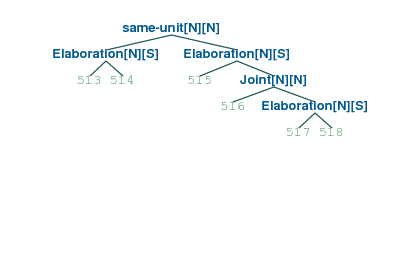

In [67]:
jupyter_draw_nltk_tree(link_tree, show_tree=True)

In [56]:
print(parsed_tree[1][0].parent)

(Joint[N][N]
  (Elaboration[N][S]
    _!broadcast it remotely through stereo speakers!_
    _!using wireless technology ,!_)
  (Elaboration[N][S]
    _!and play it through your car speakers!_
    _!using either a CD adaptor or FM stereo broadcaster.q . <P>!_))


In [68]:
parsed_tree.height()

4

In [69]:
link_tree.height()

5